# FINAL PROJECT

***PROJECT GOAL***

The following project aims to visualize the salary distribution among different data science jobs across the world

***DATA SOURCES***

The source of data for the project is taken from the following links:


https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

https://www.kaggle.com/code/retinpkumar/data-science-jobs-salaries-dataset-analysis/data

The first step is importing data from the data sources

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

JobSalaries - This class has 3 functions: read_data, show_cols, merge_datasets.

read_data - Reads 3 datasets from csv and urls and Returns 3 dataframes.

show_cols - The purpose of this function is to check if the three dataframes have the same number of columns.

merge_datasets - Merging three datasets together.

In [2]:
class JobSalaries:
    
    """Class to merge datasets"""
  
    path = 'Data Science Jobs Salaries.csv'
    path2 = 'ds_salaries.csv'
    json_url = r'https://raw.githubusercontent.com/Mbicha/data_science/main/data/salaries_cyber.json'

    def __init__(self, path=path, path2=path2, url=json_url):
        """Initialize variables"""
        self.path = path
        self.path2 = path2
        self.url = url

    def read_data(self):
        """
        Reads csv and json url
        Returns 3 dataframes; df1, df2, df3
        """

        df1 = pd.read_csv(self.path)
        df2 = pd.read_csv(self.path2)
        df3 = pd.read_json(self.url)

        return df1, df2, df3
    def show_cols(self):
        """/0
        Check whether all columns in the 3 datasets are the same.
        This is in order to decide dataset merging method.
        Return list of different columns in the datasets.
        Return True if all columns accross datasets are the same.
        """
        df1, df2, df3 = self.read_data()

        lst = []

        df1_cols = (df1.columns).to_list()
        df2_cols = (df2.columns).to_list()
        df3_cols = (df3.columns).to_list()

        for i in df1_cols:
            if i in (df2_cols and df3_cols):
                pass
            else: 
                lst.append(i)

        if len(lst) > 0:
            return lst
        else:
            return True

    def merge_datasets(self):
        """
        If data has same number of columns and we use vertical concatation.
        If we want to add some columns, then we use join or merge.
        return merged dataframe
        """
        df1, df2, df3 = self.read_data()
        first_merge = pd.concat([df1, df2], axis = 0, ignore_index = True)
        last_merge = pd.concat([first_merge, df3], axis = 0, ignore_index = True)

        return last_merge

**AGGREGATION AND PIVOTING**

AggregationPivoting - This class has only one function. The class accepts one paremeter which is in the form of the dataframe. For this project, the dataframe is passed from merged datasets. But any dataframe can be passed.

pivot_df - This function is used for pivoting a dataframe. The function accepts one parameter which is the index.

In [3]:
class AggregationPivoting:
    """Pivote and aggregation class"""

    def __init__(self, df):
        """Initialize variables"""
        self.df = df

    def pivot_df(self, idx):
        """
        Accepts 1 parameters: idx\n
        idx - index for a pivot table\n
        Return a pivot table
        """
        return pd.pivot_table(data=self.df, index=idx)

**TRANSFORMATIONS**

Transformations - This class accepts one parameter dataframe. The purpose of this class is doing some data cleaning and getting the final cleaned dataframe used for visualizing salary datasets.

In [4]:
class Transformations:
    """Class with function for dataframe manipulation"""

    def __init__(self, df):
        """Initilize variables in Tranformtion class"""
        self.df = df
    
    def remove_duplicates(self):
        """
        Drop all duplicated rows
        return dataframe without duplicates
        """
        return self.df.drop_duplicates()

    def capitalize_firstletters(self, df, col):
        """
            Accepts 2 parameters (dataframe, column name)
            Example: capitalize_firstletters(df, 'job_title')
            Return dataframe with colunm name passed as paremeter capitalized
        """
        return df[col].str.capitalize()

    def replace_numeric_values(self, df, col):
        """
            Accepts 2 parameters: df, col.
            df - Dataframe, col - target colunm.
            Example: replace_numeric_values(df, 'salary').
            Replace value with mean of the target column.
            return df with no missing numeric values.
        """
        mean_value = df[col].mean()
        return col.replace(mean_value, np.isnan)
    def find_some_values(self, df, col, value):
        """
            Accepts 3 parameters: df, col, value
            df - Dataframe, col-Where to look, value - value to find
            Example: find_some_values(df, 'salary' 54000)
            Return row(s) where the value is as given
        """
        return df.loc[df[col] == value]
    
    def select_one_column(self, df, col):
        """
            Accepts 2 paremeter: df, col
            df - Dataframe, col - column 1
            Return columns sesected
        """
        
        return df[col]

    def select_some_columns(self, df, x, y):
        """
            Accepts 3 paremeter: df, x, y
            df - Dataframe, x - column 1, y - column 2
            Return columns selected
        """
        col1, col2 = df[x], df[y]
        return col1, col2


In this section, AggregationPivot is applied. The merged datasets are pivoted twice.











In [5]:
job_salaries = JobSalaries()
job_df = job_salaries.merge_datasets()

# Pivot some data
pivot_tbl = AggregationPivoting(df=job_df)
work_year_pivot = pivot_tbl.pivot_df(idx='work_year')
work_year_pivot.head()


,remote_ratio,salary,salary_in_usd
work_year,,,
2020,62.890625,205456.136719,105346.292969
2021,68.830243,292410.058488,103365.447932
2022,75.641026,711789.151616,132356.651059
2020,65.151515,411236.515152,98910.893939
2021e,70.670391,536207.452514,100220.916201


In [6]:
experience_level_pivot = pivot_tbl.pivot_df(idx='experience_level')
experience_level_pivot.head()

,remote_ratio,salary,salary_in_usd
experience_level,,,
EN,66.666667,179960.952381,62523.490196
EX,79.545455,295086.054545,202953.681818
MI,64.491758,335693.953297,96381.243132
SE,77.046460,750091.936947,141380.611726


Drop all duplicates and return a new dataframe without duplicates.

In [15]:
transformation = Transformations(df=job_df)

#removing duplicated data

remove_duplicates = transformation.remove_duplicates()
remove_duplicates.head(3)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M


Capitalize first letters of words in the targeted column. The target column is passed as a parameter.

In [8]:
#capitalize first letter of job_title

capitalize_first_letters = transformation.capitalize_firstletters(
    df=remove_duplicates, col='job_title')
capitalize_first_letters.head()

0      Data science consultant
1               Data scientist
2         Head of data science
3                 Head of data
4    Machine learning engineer
Name: job_title, dtype: object

Here we apply some find_some_values function to return dataframe of found values.

In [16]:
# Find value 85000 in the salary column

find_value = transformation.find_some_values(df=remove_duplicates, col='salary',value=85000)
find_value

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
98,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
114,2021e,EN,FT,Machine Learning Engineer,85000,USD,85000,NL,100,DE,S
161,2020,MI,FT,Data Analyst,85000,USD,85000,US,100,US,L
166,2021e,MI,FT,Data Scientist,85000,GBP,117583,GB,50,GB,L
247,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
259,2020,MI,FT,Data Analyst,85000,USD,85000,US,100,US,L
406,2021,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
466,2021,MI,FT,Data Scientist,85000,GBP,116914,GB,50,GB,L
518,2021,EN,FT,Machine Learning Engineer,85000,USD,85000,NL,100,DE,S


Here we apply some find_some_values function to return dataframe of found values.

In [18]:
# select work year from find_value_df

work_year_asX = transformation.select_one_column(df=find_value, col='work_year')
work_year_asX.head()

2      2021e
98      2020
114    2021e
161     2020
166    2021e
Name: work_year, dtype: object

**DATA VISUALIZATION**


In this section we are going to visualize data to show salaries are distributed in variuos area of the globe.

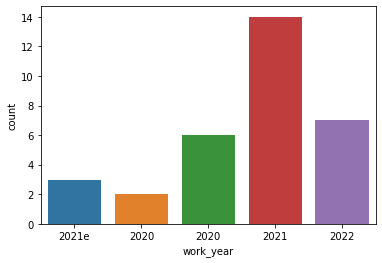

In [19]:
def count_plot_work_year():
    """
    Count plot to show value count of work year where salary = 85000
    """
    return sns.countplot(data=find_value, x=work_year_asX)
count_plot_work_year()

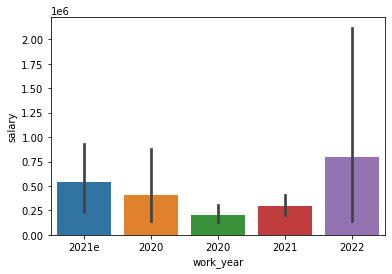

In [20]:
def bar_plot():
    """
    Bar plot to show distibution of salaries against work year
    """
    # select x and y
    barX,barY = transformation.select_some_columns(
        df=remove_duplicates, x='work_year', y='salary'
        )
    return sns.barplot(x=barX, y=barY)
bar_plot()

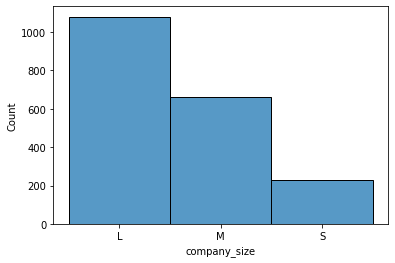

In [21]:
def hist_plot():
    """
    Display histplot distribution of company size
    """
    x = transformation.select_one_column(df=remove_duplicates, col='company_size')
    return sns.histplot(x=x)
hist_plot()

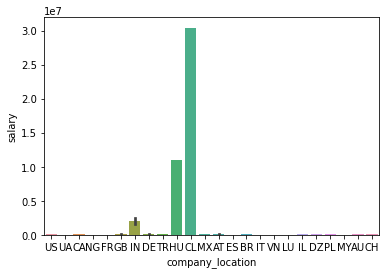

In [22]:
def bar_plot_distribution_plot(job_title):
    """
    Display Bar plot of salary distribution whereby 
    title, location are passed as a parameter
    """
    df = transformation.find_some_values(
        df=remove_duplicates, col='job_title', value=job_title)
        
    barX, barY = transformation.select_some_columns(
        df=df, x='company_location', y='salary'
    )

    return sns.barplot(x=barX, y=barY)

bar_plot_distribution_plot('Data Scientist')

**CONCLUSION**

From the above visualizations and distributions, we conlude that;

 * There were more jobs in 2021.
 * The salary increased more on 2022 than any other year.
 * Most of the jobs were from the Large companies.
 * Higest salaries are from CL and HU locations.